<h3> SciPython/Practical_classes_5

Given two features $X_1$ and $X_2$, the task is to find a set of weights $[w_1, w_2, w_0]$ such that the linear decision function:

$g(X_1, X_2) = w_1 X_1 + w_2 X_2 + w_0$

correctly classifies the observations into two classes, i.e.:

- the inequality $g(X_1,X_2)>0$ holds for all observations from one class,
- the inequality $g(X_1,X_2)<0$ holds  for all observations from the other class.

This defines a linear decision boundary used in Support Vector Machines (SVM)

<h4> Exercise1: Given two features $X_1$ and $X_2$ and function $g(X_1,X_2) = 2X_1 - 4X_2+1$ decide which of the following observarions belong to the same groups:
    
1. $X_1 = 1$,  $X_2 = -2$
2. $X_1 = 3$,  $X_2 = 1$
3. $X_1 = -1$, $X_2 = 1$
4. $X_1 = 0$,  $X_2 = 2$
5. $X_1 = 0$,  $X_2 = 0$
    
Interpret the coefficients of the function $g$.

In [3]:
import numpy as np
x1 = np.array([1, 3, -1, 0, 0])
x2 = np.array([-2, 1, 1, 2, 0])

def func(x1, x2):
    result = 2*x1 - 4*x2 + 1
    for i in range(len(result)):
        if result[i] > 0:
            print(f'obserwacja {i+1} w kategorii 1')
        elif result[i] < 0:
            print(f'obserwacja {i+1} w kategorii 0')
        else:
            print(f'wynik obserwacji {i+1} to zero')

func(x1, x2)
'''
wzrost x1 promuje kategorie 1 (wieksze od 0)
wzrost x2 promuje kategorie 0

Wyraz wolny (1):
Przesuwa granicę decyzyjną. Jeśli x1 i x2 są równe zero, to g(x1,x2) = 1 co oznacza domyślną klasyfikację do kategorii 1
'''

obserwacja 1 w kategorii 1
obserwacja 2 w kategorii 1
obserwacja 3 w kategorii 0
obserwacja 4 w kategorii 0
obserwacja 5 w kategorii 1


In [6]:
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

<h4> SVM - 2 classes

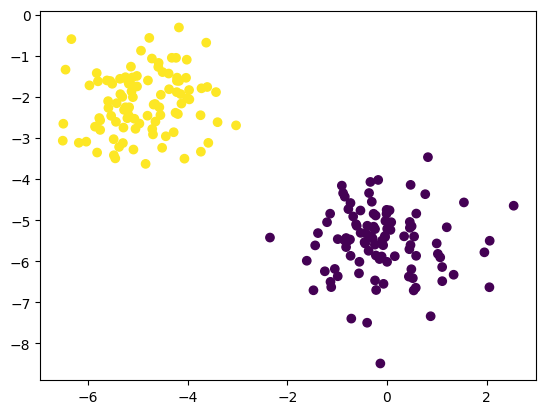

In [7]:
X, y = make_blobs(n_samples=200, random_state=50,
                  n_features=2, centers = 2, 
                  cluster_std = 0.8) 

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show() 

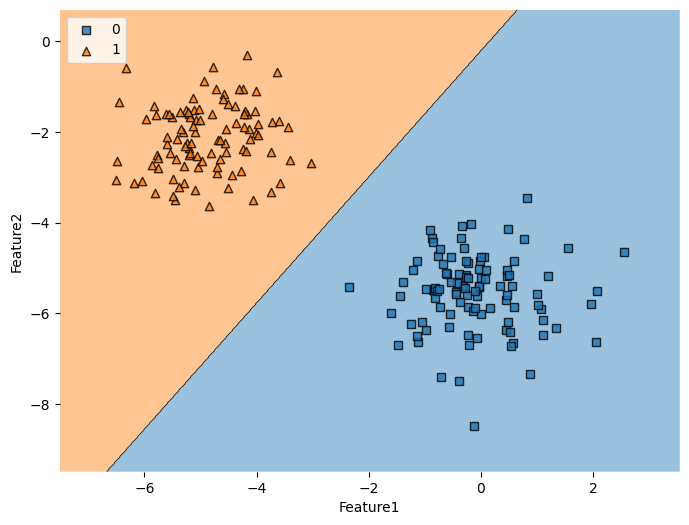

In [8]:
svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X, y);


plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

In [9]:
print(svm.coef_, svm.intercept_)

[[-0.38308393  0.27570322]] [0.05866402]


$g(x) = w^TX+w_0$

In [10]:
X1 = 0
X2 = -6

X1*(-0.38308393)+X2*0.27570322+0.05866402

-1.5955553000000002

In [11]:
X1 = -6
X2 = 2

X1*(-0.38308393)+X2*0.27570322+0.05866402

2.9085740400000004

<h4> Preprocessing (standardization)

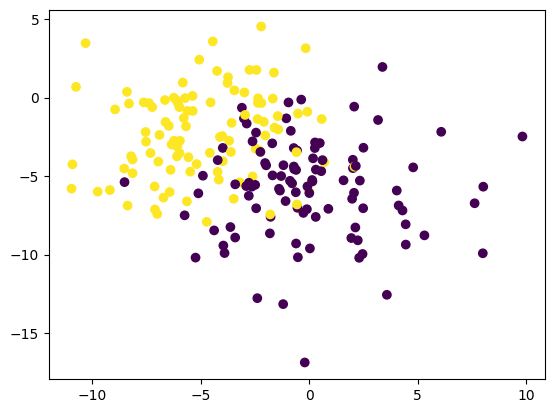

0.9

[[18  3]
 [ 1 18]]

              precision    recall  f1-score   support

           A       0.95      0.86      0.90        21
           B       0.86      0.95      0.90        19

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [12]:
X, y = make_blobs(n_samples=200, random_state=50,
                  n_features=2, centers = 2, 
                  cluster_std = 3) 

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show() 

svm = SVC(kernel='linear', C=0.01, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm.fit(X_train, y_train);


print(svm.score(X_test, y_test)) #accuracy
print()

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svm.predict(X_test))) #confusion matrix
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, svm.predict(X_test), target_names = ["A","B"]))

<h4> SVM - 3 classes

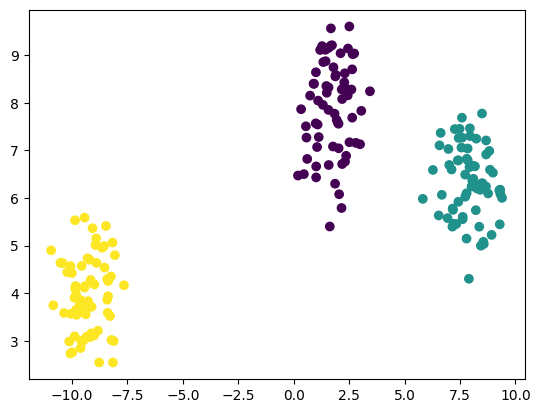

In [13]:
from sklearn.datasets import make_blobs 

X, y = make_blobs(n_samples=200, random_state=20,
                  n_features=2, centers = 3, 
                  cluster_std = 0.8) 

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show() 

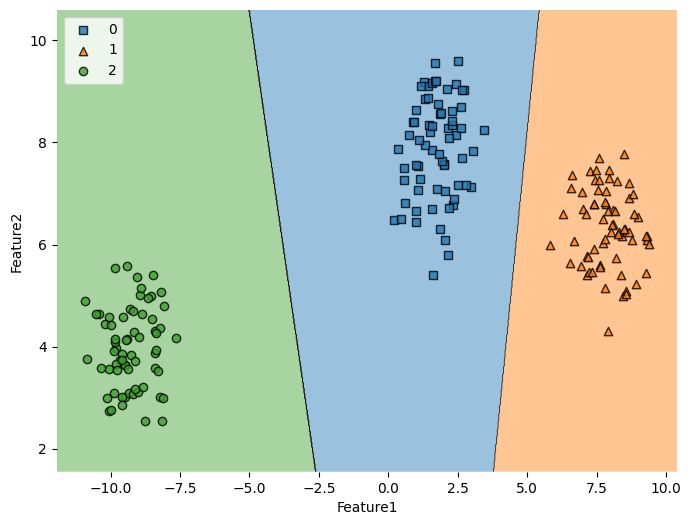

In [14]:
svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

<h4> Exercise2: Consider the Digits dataset. Is the dataset balanced? Divide the data into training and test sets using an 8:2 ratio. Build an SVM classifier using the training set. Then, print the confusion matrix and the classification report for the test set.

[ 0.  0.  0.  2. 13.  0.  0.  0.  0.  0.  0.  8. 15.  0.  0.  0.  0.  0.
  5. 16.  5.  2.  0.  0.  0.  0. 15. 12.  1. 16.  4.  0.  0.  4. 16.  2.
  9. 16.  8.  0.  0.  0. 10. 14. 16. 16.  4.  0.  0.  0.  0.  0. 13.  8.
  0.  0.  0.  0.  0.  0. 13.  6.  0.  0.]
4


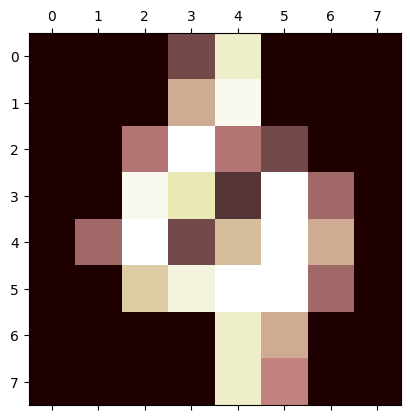

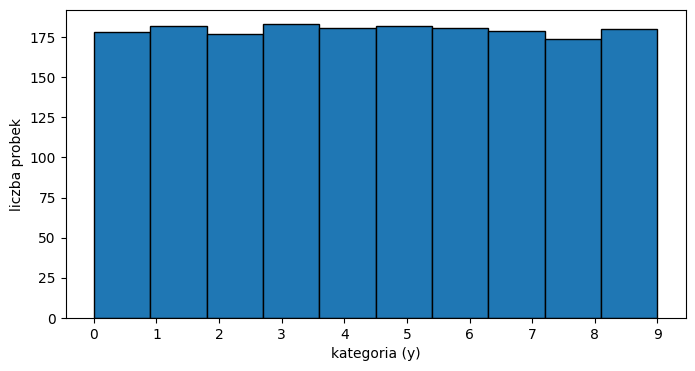

In [3]:
from sklearn.datasets import load_digits
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

digits = load_digits()

X = digits['data']
y = digits['target']

print(X[100])
print(y[100])

plt.matshow(X[100].reshape(8,8), cmap = "pink")
plt.show()


# Sprawdzenie rozkładu klas
plt.figure(figsize=(8, 4))
plt.hist(y, bins=10, edgecolor='black')
plt.xlabel('kategoria (y)')
plt.ylabel('liczba probek')
plt.xticks(range(10))
plt.show()
#is the data set balanced -> w miare rowne sa


In [8]:
#Divide the data into training and test sets using an 8:2 ratio
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Podział na zbiór treningowy i testowy (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build an SVM classifier using the training set
svm_model = SVC(kernel='linear', C=0.01, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm_model.fit(X_train, y_train)

#print the confusion matrix and the classification report for the test set.y_pred = svm_model.predict(X_test)

print(svm_model.score(X_test, y_test)) #accuracy
print()

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svm_model.predict(X_test))) #confusion matrix
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, svm_model.predict(X_test), target_names = [str(i) for i in range(10)]))
'''
accuracy 97% -> bardzo dobra
confusion matrix -> błędów jest niewiele i są one rozproszone – żaden typ klasyfikacji nie dominuje w pomyłkach
'''

0.9777777777777777

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  1  1  0  0  0  0  0 37  0]
 [ 0  0  0  1  0  1  0  0  0 39]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       0.97      1.00      0.99        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      0.97      0.99        39
           8       0.97      0.95      0.96        39
           9       0.97      0.95      0.96        41

    accuracy                           0.98       36

<h4> Hyperparameters

* C - controls the trade-off between achieving a low training error and a low testing error (generalization)


Small C → allows more misclassifications, leads to a simpler model with a wider margin (better generalization).

Large C → tries to classify all training examples correctly, leads to a more complex model with a narrower margin (risk of overfitting).

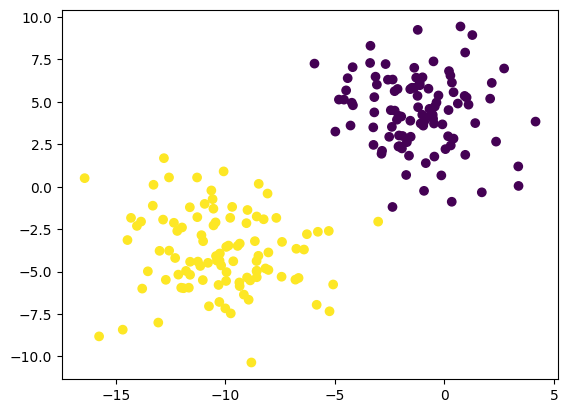

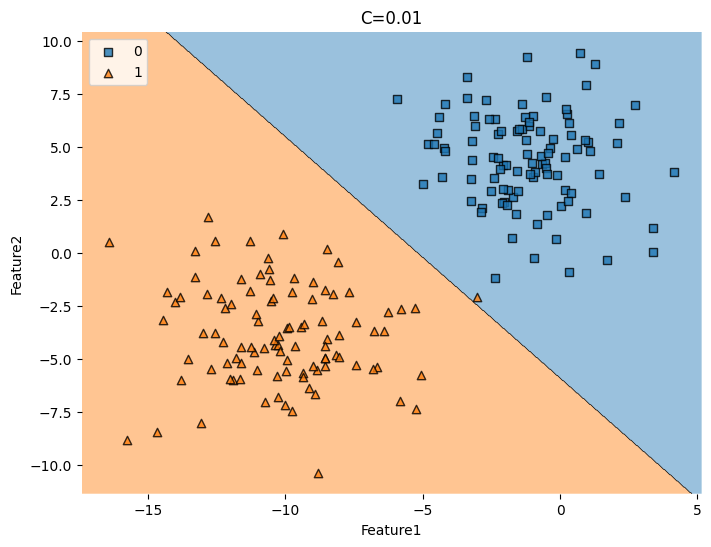

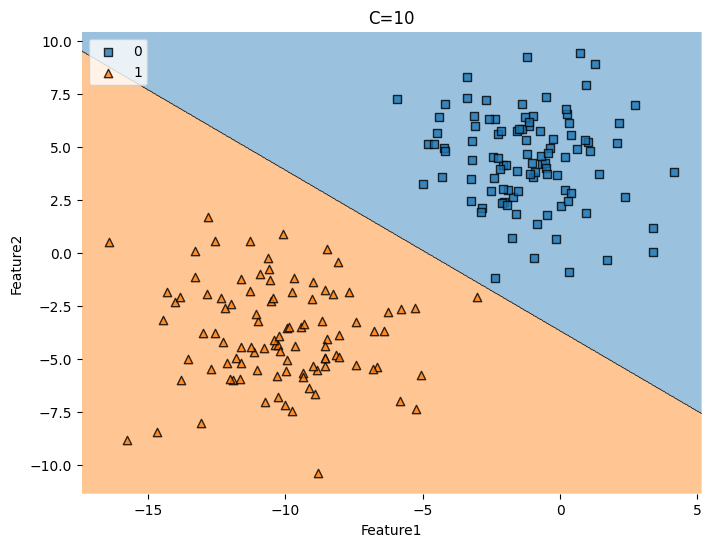

In [9]:
'''
C – kontroluje kompromis między niskim błędem na zbiorze treningowym a 
niskim błędem na zbiorze testowym (czyli zdolnością do uogólniania).

Mała wartość C → pozwala na więcej błędnych klasyfikacji, prowadzi do prostszego 
modelu z szerszym marginesem (lepsza zdolność do generalizacji).
Duża wartość C → próbuje poprawnie sklasyfikować wszystkie przykłady treningowe, 
prowadzi do bardziej złożonego modelu z węższym marginesem (ryzyko przeuczenia)
'''
X, y = make_blobs(n_samples=200, random_state=1,
                  n_features=2, centers = 2, 
                  cluster_std = 2.3) 

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show() 

############

svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.title("C=0.01")
plt.show()

############

svm = SVC(kernel='linear', C=10, random_state=0)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.title("C=10")
plt.show()

* RBF kernel, $\gamma$ - defines how far the influence of a single training example reaches


Small $\gamma$ → smoother decision boundary, model is less complex (risk of underfitting).

Large $\gamma$ → tighter around data, model is more complex (risk of overfitting).

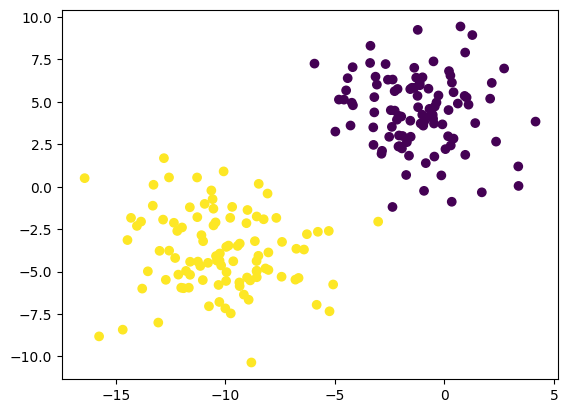

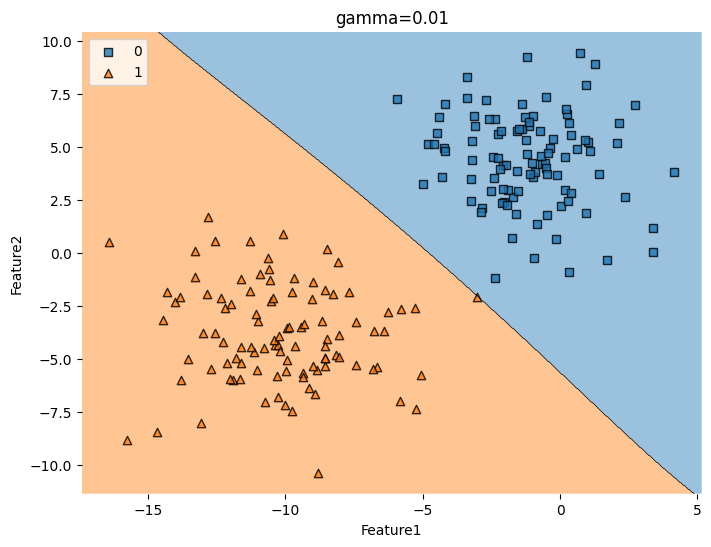

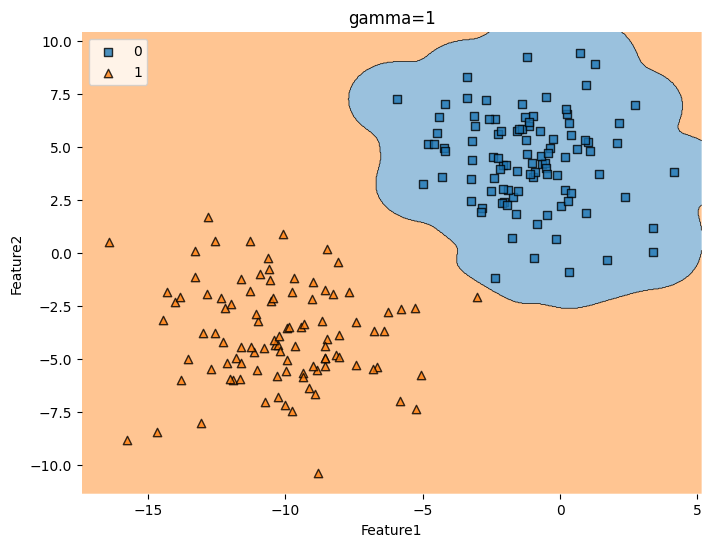

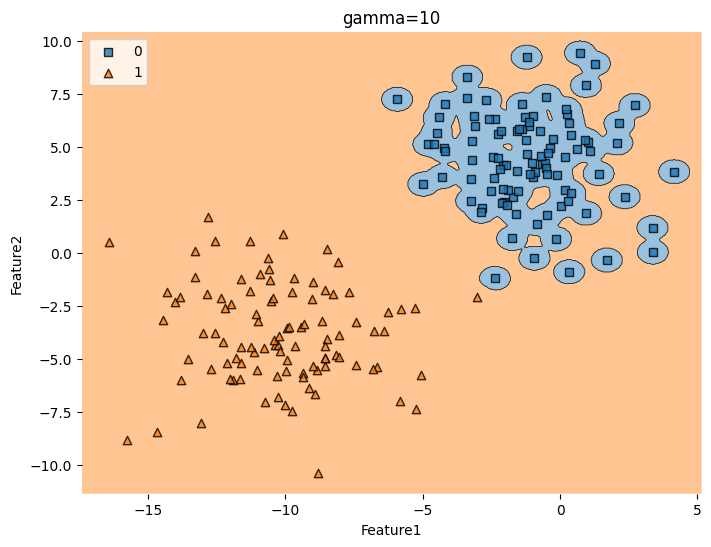

In [10]:
'''
RBF kernel, gamma – określa, jak daleko sięga wpływ pojedynczego przykładu treningowego

Małe gamma → gładsza granica decyzyjna, model jest mniej złożony (ryzyko niedouczenia).
Duże gamma → model mocno dopasowany do danych, granica decyzyjna ściśle otacza punkty (ryzyko przeuczenia).
'''
X, y = make_blobs(n_samples=200, random_state=1,
                  n_features=2, centers = 2, 
                  cluster_std = 2.3) 

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show() 

##########

svm = SVC(kernel='rbf', gamma=0.01, random_state=0)
svm.fit(X, y);


plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.title("gamma=0.01")
plt.show()

#############

svm = SVC(kernel='rbf', gamma=1, random_state=0)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.title("gamma=1")
plt.show()

#############

svm = SVC(kernel='rbf', gamma=10, random_state=0)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.title("gamma=10")
plt.show()


<h4> Adjusting hyperparameters

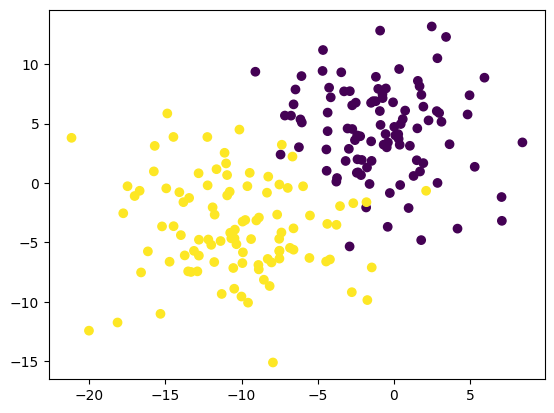

In [11]:
X, y = make_blobs(n_samples=200, random_state=1,
                  n_features=2, centers = 2, 
                  cluster_std = 4) 

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show() 

In [12]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'clf__C':param_range, 'clf__kernel':['linear']},
              {'clf__C':param_range, 'clf__kernel':['rbf'], 'clf__gamma':param_range}]


gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1) #cv-cross validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gs = gs.fit(X_train, y_train) 

print(gs.best_score_, gs.best_params_, gs.score(X_test, y_test))

0.9642857142857144 {'clf__C': 10.0, 'clf__kernel': 'linear'} 0.9833333333333333


https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

<h4> Exercise 3: Consider the diabetes dataset.

- Is the dataset balanced?
- Split the data into training and test sets (8:2).
- Tune the hyperparameters using GridSearch and Cross-validation.
- Print the confusion matrix and classification report for the test set.

In [13]:
import pandas as pd

df = pd.read_csv("diabetes.csv", sep =",")

In [14]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [15]:
df.shape

(253680, 22)

In [16]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [17]:
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

In [20]:
#is the dataset balanced
print("Class distribution:\n", y.value_counts(normalize=True)) 
# dużo więcej jest tych w kategorii 0

Class distribution:
 Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


In [21]:
#Split the data into training and test sets (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [23]:
#Tune the hyperparameters using GridSearch and Cross-validation.
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'clf__C':param_range, 'clf__kernel':['linear']},
              {'clf__C':param_range, 'clf__kernel':['rbf'], 'clf__gamma':param_range}]


gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1) 

gs = gs.fit(X_train, y_train) 

print(gs.best_score_, gs.best_params_, gs.score(X_test, y_test))

y_pred = gs.predict(X_test)

#Print the confusion matrix and classification report for the test set.\

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svm_model.predict(X_test)))
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, svm_model.predict(X_test), target_names = ["No Diabetes", "Diabetes"]))


KeyboardInterrupt: 

In [ ]:
#model prostszy
#Tune the hyperparameters using GridSearch and Cross-validation.
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

param_range = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'clf__C':param_range, 'clf__kernel':['linear']},
              {'clf__C':param_range, 'clf__kernel':['rbf'], 'clf__gamma':param_range}]


gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1) 

gs = gs.fit(X_train, y_train) 

print(gs.best_score_, gs.best_params_, gs.score(X_test, y_test))

y_pred = gs.predict(X_test)

#Print the confusion matrix and classification report for the test set.\

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svm_model.predict(X_test))) 
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, svm_model.predict(X_test), target_names = ["No Diabetes", "Diabetes"]))


* Example: Calculate the distance between the point $P(3,-2)$ and the funtion $f(x) = x^2$.

$f(x) = \sqrt{(x-3)^2+(x^2+2)}$ - distance between $(x,x^2)$ and $(3,-2)$.

$\min_x \sqrt{(x-3)^2+(x^2+2)} = \min_x [(x-3)^2+(x^2+2)] = \min_x [x^2-6x+9+x^4+4x^2+4] = \min_x [x^4+5x^2-6x+13] \approx 11.30$ for $x \approx 0.54$

<h4> Exercise4 (non-linear functions):
    
- Given the following data, propose an example $f(x)=ax^2$ that separate the data. Visualize the results. 
    
- Find $a$ that maximize the margin between the data and $f(x)=ax^2$. Visualize the results.

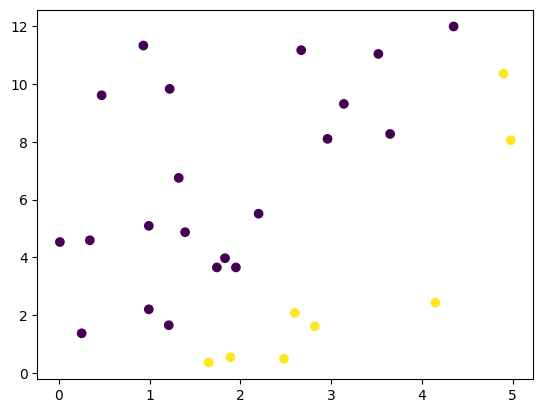

In [4]:
X = np.array([[1.22, 9.83], [2.6, 2.08], [2.82, 1.61], [0.99, 2.2], [1.89, 0.54], [1.74, 3.65], [0.01, 4.53], [1.21, 1.65], [1.65, 0.36], [2.48, 0.49], [2.67, 11.17], [3.52, 11.04], [1.83, 3.97], [4.98, 8.05], [0.25, 1.37], [3.14, 9.31], [2.2, 5.51], [3.65, 8.27], [0.34, 4.59], [0.47, 9.61], [0.99, 5.09], [4.15, 2.43], [4.9, 10.36], [0.93, 11.33], [2.96, 8.1], [1.95, 3.65], [4.35, 11.99], [1.39, 4.87], [1.32, 6.75]])
y = np.array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

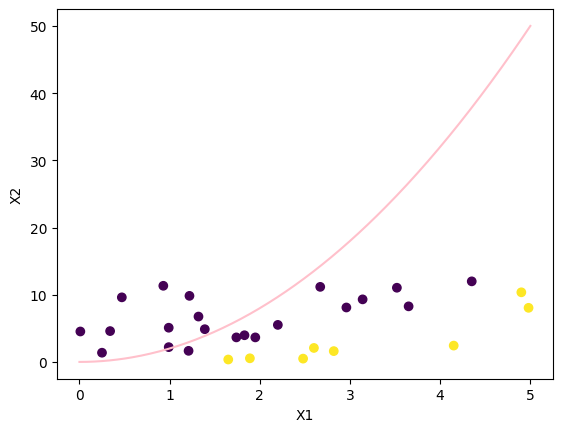

In [7]:
#ex 4

a = 2 #<- wymyślony parametr

x_vals = np.linspace(0, 5, 300)
f_vals = a * x_vals**2

# Rysujemy
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x_vals, f_vals, color='pink')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Najlepsze a: 0.507


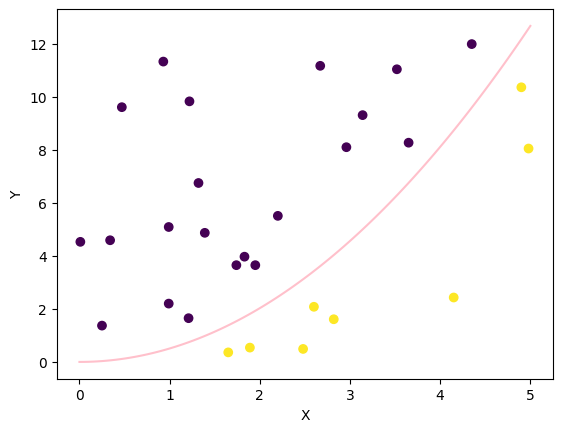

In [19]:
#Find a that maximize the margin between the data and f(x)=ax**2. Visualize the results.
from scipy.optimize import minimize

#odległość
def distance(x, a, punkt):
    return np.sqrt((x-punkt[0])**2 + (a*x**2-punkt[1])**2)

def find_min_distance(a, X, y):
    min_distance = np.inf
    for punkt, klasa in zip(X, y):
        result = minimize(lambda x: distance(x, a, punkt), x0=punkt[0])
        x_opt = result.x[0]
        dist = distance(x_opt, a, punkt)
        
        if (klasa == 1 and punkt[1] < a * x_opt**2) or (klasa == 0 and punkt[1] > a * x_opt**2):
            if dist < min_distance:
                min_distance = dist
        else:
            return -np.inf
    return min_distance

def find_best_a(X, y, a_range=(0.1, 2.0), steps=1000):
    best_a = None
    best_margin = -np.inf
    for a in np.linspace(a_range[0], a_range[1], steps):
        current_margin = find_min_distance(a, X, y)
        if current_margin > best_margin:
            best_margin = current_margin
            best_a = a
    return best_a

best_a = find_best_a(X, y)
print(f"Najlepsze a: {best_a:.3f}")



x_vals = np.linspace(0, 5, 100)
y_vals = best_a * x_vals**2

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x_vals, y_vals, color='pink')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


<h4> Exercise5*: Consider the following data

https://doi.org/10.1371/journal.pone.0111478.s003

https://doi.org/10.1371/journal.pone.0111478.s004

- Choose at least five physicochemical properties of amino acids.
- Represent each sequence as a vector based on the selected properties of its amino acids.
- Standardize the data before training.
- Reduce the number of features using F-score and Incremental Feature Selection (IFS)
- Build an SVM model and remember to tune its hyperparameters.
- Evaluate your model on the test data using different performance metrics - for K, P, R, T separately. 
- Compare your results with the literature. Make commments.

In [ ]:
#ex 5

In [2]:
import numpy as np
from sklearn.feature_selection import f_classif
import pandas as pd

#Data
X = np.array([
    [2.5, 0.3, 1.1, 4.2],
    [2.4, 0.4, 1.0, 4.1],
    [2.3, 0.2, 1.3, 4.0],
    [2.2, 0.5, 1.2, 4.3],
    [2.6, 0.3, 1.1, 4.1],
    [3.5, 1.3, 3.1, 2.2],
    [3.4, 1.4, 3.0, 2.1],
    [3.6, 1.2, 3.3, 2.0],
    [3.3, 1.5, 3.2, 2.3],
    [3.7, 1.3, 3.1, 2.4],
])

#labels
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

#F-score and p-value
F, p = f_classif(X, y)

#Print the results
features = ['F1', 'F2', 'F3', 'F4']
df = pd.DataFrame({
    'Feature': features,
    'F-score': F,
    'p-value': p
})

print(df.sort_values(by='F-score', ascending=False))

  Feature     F-score       p-value
2      F3  769.230769  3.081868e-09
3      F4  495.210526  1.757923e-08
1      F2  192.307692  7.071087e-07
0      F1  121.000000  4.148844e-06
